In [242]:
##########################################ALL NEEDED IMPORT FOR THE PROJECT ############################################
####################General Imports
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pandas.plotting import scatter_matrix
###################Imports for Splitting Data
from sklearn.model_selection import train_test_split
###################Imports for data Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
###################Import for Linear Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
###################GridSearch
from sklearn.model_selection import GridSearchCV
##################Import Binarize
from sklearn .preprocessing import binarize
##################Imports for Clasification Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
###################Imports for Accuracy check
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
###################StringIO
#from sklearn.externals.six import StringIO 
#from IPython.display import Image
###################DateTime
###################DateTime
#from datetime import datetime
################Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import mean_squared_error
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points using default Euclidian methods
################PipeLine
from sklearn.pipeline import make_pipeline


In [243]:
######################## HELPER FUNCTIONS ########################################

In [457]:
def Use_SVCClassifier(df,input_cols, output_col,t_size=0.2, r_state=10, s_scaler=False,poly_degree=0,C=10,plot=False, plot_simple=False, Roc=False):
    global model
    global X,Y,x_train,x_test,y_train,y_test, y_pred
    #If Input_cols = 0 then take all Colums except Output Column
    if(input_cols == 0):
        X = df.drop(output_col, axis=1)
    else:
        X = df[input_cols]
    Y = df[output_col]
    #Splitting the Data In to Testing and Training
    x_train, x_test, y_train,y_test = train_test_split(X, Y, test_size = t_size, random_state=r_state)
        
    if(s_scaler == True):
        sc = StandardScaler()
        x_train_scale = sc.fit_transform(x_train.astype(float))
        x_test_scale = sc.transform(x_test.astype(float))
        x_train = x_train_scale
        x_test = x_test_scale
    
    if(poly_degree):
        poly = PolynomialFeatures(poly_degree)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.transform(x_test)
        x_train = x_train_poly
        x_test = x_test_poly      
   
           
    #C is the regularization Coefficeint (Smaller Value Stronger Reqularization)
    model = SVC(C = C, kernel='rbf', gamma='auto', random_state=10)
    print(model)
    model.fit(x_train, y_train)   
    y_pred = model.predict(x_test)
    print("___________________________________________________\n")
    print("Confustion Matrix for y_test and y_pred :\t")
    print("TN  FP")
    print("FN  TP\n")
    print(confusion_matrix(y_test, y_pred))
    #print(pd.crosstab(y_test, y_pred))
    print("\n")
    print("Accuray = (TP+TN)/(TP + TN + FP + FN)\n")
    print("Precission = TP/(TP + FP)\n")
    print("Recall = TP/(TP + FN)\n")
    print("\n")
    print("Train Accuracy  : {0}\n".format(accuracy_score(y_train, model.predict(x_train))))
    print("Test Accuracy   : {0}\n".format(accuracy_score(y_test, y_pred)))
    print("Precision Score : {0}\n".format(precision_score(y_test,y_pred, average=None)))
    print("Recall Score    : {0}\n".format(recall_score(y_test,y_pred, average=None)))
    print("F1 Score        : {0}\n".format(f1_score(y_test,y_pred, average=None)))
    print("___________________________________________________\n")
    print("Classification Report :\n")
    print(classification_report(y_test, y_pred))
    print("___________________________________________________")
    #Uncomment to print the probabilities 
    #print((model.predict_proba(x_test)))
          
    if(plot == True):
        plt.figure(figsize=(5,5))
        plt.title("Comparing Distribution of y_test(Red) and y_predict(Green)")
        sns.distplot(y_pred, kde=True, rug=True, color = 'green')
        sns.distplot(y_test, kde=True, rug=True, color='red')
        
    
    if(plot_simple == True):
        plt.figure(figsize=(5,5))
        plt.title("Comparing Distribution of y_test(Red) and y_predict(Green)")
        pd.Series(y_pred).plot(kind='kde', color='green')
        y_test.plot(kind='kde', color='red')                     
        

In [458]:

def Use_RandomForestClassifier(df,input_cols, output_col,t_size=0.2, d_random_state=1,random_state=1, s_scaler=False,poly_degree=0,min_max = False,n_estimators =5, min_samples_split=2,min_samples_leaf=1,max_depth=None,max_features=None,criterion='entropy', Roc=False,n_jobs = 2, hack_threshold = 0.5,plot_simple=False,plot_features=True, plot=False):
    global model
    global X,Y,x_train,x_test,y_train,y_test, y_pred
    #If Input_cols = 0 then take all Colums except Output Column
    if(input_cols == 0):
        X = df.drop(output_col, axis=1)
    else:
        X = df[input_cols]
    
    Y = df[output_col]
    #Splitting the Data In to Testing and Training
    x_train, x_test, y_train,y_test = train_test_split(X, Y, test_size = t_size, random_state=d_random_state)
    print(type(x_train))
    
    if(s_scaler == True):
        sc = StandardScaler()
        x_train_scale = sc.fit_transform(x_train.astype(float))
        x_test_scale = sc.transform(x_test.astype(float))
        x_train = x_train_scale
        x_test = x_test_scale
    
    if(poly_degree):
        poly = PolynomialFeatures(poly_degree)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.transform(x_test)
        x_train = x_train_poly
        x_test = x_test_poly      
     
                
    model = RandomForestClassifier(criterion=criterion,random_state=random_state,max_depth=max_depth, min_samples_leaf=min_samples_leaf, n_estimators=n_estimators, n_jobs=n_jobs)
    print(model)
    model.fit(x_train, y_train)   
    y_pred = model.predict(x_test)
    print("___________________________________________________\n")
    print("Confustion Matrix for y_test and y_pred :\t")
    print("TN  FP")
    print("FN  TP\n")
    print(confusion_matrix(y_test, y_pred))
    #print(pd.crosstab(y_test, y_pred))
    print("\n")
    print("Accuray = (TP+TN)/(TP + TN + FP + FN)\n")
    print("Precission = TP/(TP + FP)\n")
    print("Recall = TP/(TP + FN)\n")
    print("\n")
    print("Train Accuracy  : {0}\n".format(accuracy_score(y_train, model.predict(x_train))))
    print("Test Accuracy   : {0}\n".format(accuracy_score(y_test, y_pred)))
    print("Precision Score : {0}\n".format(precision_score(y_test,y_pred, average=None)))
    print("Recall Score    : {0}\n".format(recall_score(y_test,y_pred, average=None)))
    print("F1 Score        : {0}\n".format(f1_score(y_test,y_pred, average=None)))
    print("___________________________________________________\n")
    print("Classification Report :\n")
    print(classification_report(y_test, y_pred))
    print("___________________________________________________")
    #Uncomment to print the probabilities 
    #print((model.predict_proba(x_test)))
               
    if(hack_threshold != 0.5):
        Roc = False
        plot = False
        plot_dt = False
        binarize_predict(model, x_train,x_test,y_train, y_test, threshold=hack_threshold)
       
    if(plot == True):
        plt.figure(figsize=(5,5))
        plt.title("Comparing Distribution of y_test(Red) and y_predict(Green)")
        sns.distplot(y_pred, kde=True, rug=True, color = 'green')
        sns.distplot(y_test, kde=True, rug=True, color='red')
        
    
    if(plot_simple == True):
        plt.figure(figsize=(5,5))
        plt.title("Comparing Distribution of y_test(Red) and y_predict(Green)")
        pd.Series(y_pred).plot(kind='kde', color='green')
        y_test.plot(kind='kde', color='red')
        
    if(Roc == True):
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
        auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
        print("AUC(Area Under the Curve) : {0}".format(auc))
        print("So the modle has {0}% chances of Distinguishing between Positive and Negative Classes".format(round((auc*100),2)))
        plt.figure(figsize=(5,5))
        plt.plot(fpr, tpr, color='blue', label='Decission Tree', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.grid(True)
        plt.legend(loc='lower right')
        print("\t\t")
        
    if(s_scaler == True):   
        if(plot_features == True):
            global names, indices
            indices = np.argsort(model.feature_importances_)[::-1]
            names = [df.columns[i] for i in indices]                                       

In [459]:
#My Helper Function to Plot the Feature Importance in a Decission Treee
def plot_features_tree(size = 10):
        plt.figure(figsize=(size,size))
        plt.title("Plotting Feature Importance for the Decission Tree")
        plt.bar(range(X.shape[1]), model.feature_importances_[indices], color='green')
        plt.xticks(range(X.shape[1]), names, rotation=90)

In [460]:
#This Fucntion uses a PIPE and inputs to the pipe are SVC and PCA :)
#Just an other way where we can apply SVC on Dataframe after PCA.

def Use_PCA_SVC_PIPE(df,input_cols, output_col,t_size=0.2, r_state=10, s_scaler=False,poly_degree=0,C=100,plot=False, plot_simple=False, Roc=False):
    global model
    global X,Y,x_train,x_test,y_train,y_test, y_pred
    #If Input_cols = 0 then take all Colums except Output Column
    if(input_cols == 0):
        X = df.drop(output_col, axis=1)
    else:
        X = df[input_cols]
    Y = df[output_col]
    #Splitting the Data In to Testing and Training
    x_train, x_test, y_train,y_test = train_test_split(X, Y, test_size = t_size, random_state=r_state)
        
    if(s_scaler == True):
        sc = StandardScaler()
        x_train_scale = sc.fit_transform(x_train.astype(float))
        x_test_scale = sc.transform(x_test.astype(float))
        x_train = x_train_scale
        x_test = x_test_scale
    
    if(poly_degree):
        poly = PolynomialFeatures(poly_degree)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.transform(x_test)
        x_train = x_train_poly
        x_test = x_test_poly
           
    #C is the regularization Coefficeint (Smaller Value Stronger Reqularization)
    pca = PCA(0.95)
    svc = SVC(C = C, kernel='rbf', gamma='auto', random_state=10)
    model = make_pipeline(pca, svc)
    #param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]} 
    #model = GridSearchCV(pipe, param_grid, cv=5)
    print(model)
    model.fit(x_train, y_train)   
    y_pred = model.predict(x_test)
    print("___________________________________________________\n")
    print("Confustion Matrix for y_test and y_pred :\t")
    print("TN  FP")
    print("FN  TP\n")
    print(confusion_matrix(y_test, y_pred))
    #print(pd.crosstab(y_test, y_pred))
    print("\n")
    print("Accuray = (TP+TN)/(TP + TN + FP + FN)\n")
    print("Precission = TP/(TP + FP)\n")
    print("Recall = TP/(TP + FN)\n")
    print("\n")
    print("Train Accuracy  : {0}\n".format(accuracy_score(y_train, model.predict(x_train))))
    print("Test Accuracy   : {0}\n".format(accuracy_score(y_test, y_pred)))
    print("Precision Score : {0}\n".format(precision_score(y_test,y_pred, average=None)))
    print("Recall Score    : {0}\n".format(recall_score(y_test,y_pred, average=None)))
    print("F1 Score        : {0}\n".format(f1_score(y_test,y_pred, average=None)))
    print("___________________________________________________\n")
    print("Classification Report :\n")
    print(classification_report(y_test, y_pred))
    print("___________________________________________________")
    #Uncomment to print the probabilities 
    #print((model.predict_proba(x_test)))
          
    if(plot == True):
        plt.figure(figsize=(5,5))
        plt.title("Comparing Distribution of y_test(Red) and y_predict(Green)")
        sns.distplot(y_pred, kde=True, rug=True, color = 'green')
        sns.distplot(y_test, kde=True, rug=True, color='red')
        
    
    if(plot_simple == True):
        plt.figure(figsize=(5,5))
        plt.title("Comparing Distribution of y_test(Red) and y_predict(Green)")
        pd.Series(y_pred).plot(kind='kde', color='green')
        y_test.plot(kind='kde', color='red')                     
        

In [461]:
def Use_Kmean_Clustering(df, output_col,n_clusters=2,max_iter=1000, plot_centroids=False, centroid_col0=0, centroid_col1=1, plot_elbow=False,plot_sil=False):
    global kmeans
    centroids = 0
    save_output_col = pd.Series()
    
                
    if(df[output_col].dtypes == 'O'):
        save_output_col = df[output_col]
        df[output_col] = LabelEncoder().fit_transform(df[output_col])
        
    kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iter).fit(np.array(df.drop(output_col, axis=1)))
    centroids = kmeans.cluster_centers_
    print("Number of Clusters   : {0}".format(n_clusters))
    print("Homogenity_Score     : {0}".format(homogeneity_score(df[output_col], kmeans.labels_)))
    print("Completeness_Score   : {0}".format(completeness_score(df[output_col], kmeans.labels_)))
    print("V_Measure_Score      : {0}".format(v_measure_score(df[output_col], kmeans.labels_)))
    print("Adjusted_Rand_Score  : {0}".format(adjusted_rand_score(df[output_col], kmeans.labels_)))
    print("Adjusted_Mutual_Info : {0}".format(adjusted_mutual_info_score(df[output_col], kmeans.labels_,  average_method='arithmetic')))
    #Silhouette_score does not need labelle data....
    print("Silhouette_score     : {0}".format(silhouette_score(df, kmeans.labels_)))
    print("\n")
    
    if(plot_centroids == True):
        print("_____________________________________________________")
        print("    Plotting Centroids and Number of Clusters = {0}".format(centroids.shape[0]))
        print("_____________________________________________________")
        plt.figure(figsize=(8,8))
        plt.scatter(centroids[:,centroid_col0], centroids[:,centroid_col1], c='g', s=250, marker='s')
        for i in range(len(centroids)):
            plt.annotate(i, (centroids[i][centroid_col0], centroids[i][centroid_col1]), fontsize=30)
            
    if(plot_elbow == True):
        cluster_err = []
        cluster_centroid = []
        for num_of_cluster in range(1,20):
            clusters = KMeans(n_clusters=num_of_cluster, n_init=5).fit(np.array(df.drop(output_col, axis=1)))
            cluster_err.append(clusters.inertia_)
            cluster_centroid.append(clusters.cluster_centers_)
        plt.figure(figsize=(12,6))
        plt.title("Plotting Elbow Plot - Centroids on X-axis and Cluster Inertia on Y-Axis")
        plt.plot(pd.Series(np.arange(1,20)), pd.Series(cluster_err), marker='o', color='blue', label='Elbow Plot')
        plt.grid(True)
        plt.legend(loc='lower right')
        
        
    if(plot_sil == True):
        cluster_sil = []
        cluster_homo = []
        cluster_comp = []
        cluster_adjrand = []
        cluster_adjmutual = []
        sil = 0
        homo = 0
        comp = 0
        adjrand = 0
        adjmutual = 0
        for num_of_cluster in range(2,20):
            clusters = KMeans(n_clusters=num_of_cluster, max_iter=1000).fit(np.array(df.drop(output_col, axis=1)))
            sil = silhouette_score(df,clusters.labels_)
            cluster_sil.append(sil)
            
        plt.figure(figsize=(12,6))
        plt.title("Silhouette_score - Centroid on X-axis and Silhoetter score on Y-axis")
        plt.plot(pd.Series(np.arange(2,20)), pd.Series(cluster_sil), marker='o', color='red', label='Sihouter score')
        plt.grid(True)
        plt.legend(loc='lower right')
        
        
    if(df[output_col].dtypes == 'O'):
        df[output_col] = save_output_col
        del(save_output_col)
    

In [462]:
def Use_Agglomerative_Clustering(df, output_col,n_clusters=2,plot_elbow=False,affinity = 'euclidean', linkage='ward',plot_sil=False):
    global agl
    centroids = 0
    save_output_col = pd.Series()
    
                
    if(df[output_col].dtypes == 'O'):
        save_output_col = df[output_col]
        df[output_col] = LabelEncoder().fit_transform(df[output_col])
        
    agl = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage).fit(np.array(df.drop(output_col, axis=1)))
    print(agl)
    print("\n")
    centroids = kmeans.cluster_centers_
    print("Number of Clusters   : {0}".format(n_clusters))
    print("Homogenity_Score     : {0}".format(homogeneity_score(df[output_col], agl.labels_)))
    print("Completeness_Score   : {0}".format(completeness_score(df[output_col], agl.labels_)))
    print("V_Measure_Score      : {0}".format(v_measure_score(df[output_col], agl.labels_)))
    print("Adjusted_Rand_Score  : {0}".format(adjusted_rand_score(df[output_col], agl.labels_)))
    print("Adjusted_Mutual_Info : {0}".format(adjusted_mutual_info_score(df[output_col], agl.labels_,  average_method='arithmetic')))
    #Silhouette_score does not need labelle data....
    print("Silhouette_score     : {0}".format(silhouette_score(df, agl.labels_)))
    print("\n")
    
        
        
    if(plot_sil == True):
        cluster_sil = []
        cluster_homo = []
        cluster_comp = []
        cluster_adjrand = []
        cluster_adjmutual = []
        sil = 0
        homo = 0
        comp = 0
        adjrand = 0
        adjmutual = 0
        for num_of_cluster in range(2,20):
            clusters = AgglomerativeClustering(n_clusters=num_of_cluster).fit(np.array(df.drop(output_col, axis=1)))
            sil = silhouette_score(df,clusters.labels_)
            cluster_sil.append(sil)
            
        plt.figure(figsize=(12,6))
        plt.title("Silhouette_score - 'No of Clusters' on X-axis and Silhoetter score on Y-axis")
        plt.plot(pd.Series(np.arange(2,20)), pd.Series(cluster_sil), marker='o', color='red', label='Sihouter score')
        plt.grid(True)
        plt.legend(loc='lower right')
        
        
    if(df[output_col].dtypes == 'O'):
        df[output_col] = save_output_col
        del(save_output_col)
    

In [463]:
def plot_dendogram(df, linkage_method):
    Z = linkage(df, linkage_method)   # creates the grid of avg linkag basesd distance between point
    c, coph_dists = cophenet(Z , pdist(df))
    print("coph_distance : {0}".format(c))
    Z = linkage(df, linkage_method)   # creates the grid of avg linkag basesd distance between point
    c, coph_dists = cophenet(Z , pdist(df))
    plt.figure(figsize=(10, 10))
    plt.title('Agglomerative Hierarchical Clustering Dendogram with linkage method -- {0}'.format(linkage_method))
    plt.xlabel('sample index')
    plt.ylabel('Distance')
    dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
    plt.tight_layout()

In [464]:
#My Correlation Function Using Inferential Statistics and PairPlot to See How Correlated Two Features are

def stats_corr2(df, input_col, output_col, plot=False):
    print("Correlation Using Inferential Statistics")
    print("___________________________________________________\n")
    print(stats.ttest_ind(df.loc[df[output_col] == 1, input_col], df.loc[df[output_col] == 0, input_col]))
    print("\n\n")
    if(plot == True):
        print("Pair Plot")
        print("___________________________________________________\n")
        sns.pairplot(df[[input_col, output_col]], hue=output_col)

In [465]:
#My Correlation Function Using Inferential Statistics and PairPlot to See How Correlated More Than 2 Features Are.

def stats_corr3(df, input_col, output_col, plot=False):
    print("Correlation Using Inferential Statistics")
    print("___________________________________________________\n")
    print(stats.f_oneway(df.loc[df[output_col] == 0, input_col], df.loc[df[output_col] == 1, input_col], df.loc[df[output_col] == 2, input_col]))
    print("\n\n")
    if(plot == True):
        print("Pair Plot")
        print("___________________________________________________\n")
        sns.pairplot(df[[input_col, output_col]], hue=output_col)

In [466]:
#My Correlation Function Using Chi2 to find Out How Correlated Two Catagorical Columns are

def stats_corr_cat(df,input_col, output_col):
    print("Correlation using Stats Chi2")
    print(stats.chi2_contingency(pd.crosstab(df[input_col],df[output_col])))

In [467]:
def Fill_Nan_with_Mode(df):
    for col in df.columns:
        if(df.loc[df[col].isnull() == True, col].shape[0] > 0):
            df.loc[df[col].isnull() == True, col] = df.loc[df[col].isnull() != True, col].mode().values[0]

In [468]:
############################################END OF HELPER FUNCTIONS########################################################

In [469]:
############################################################################################################################

In [470]:
########################################PROJECT STARTS HERE ################################################################

In [471]:
###########################################################################################################################

In [472]:
#Reading Data from vehicle-1.csv
df = pd.read_csv('vehicle-1.csv')

In [473]:
df.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [474]:
df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [475]:
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [476]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [477]:
#Converting Class from object of type int....by Label Encoding it
df['class'] = LabelEncoder().fit_transform(df['class'])

In [478]:
#Finding out Missing Values 
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [479]:
#Since There are very Few Missign Values in every columns ...Replacing them with the Mode of the same Column
#My Own Helper Fucntion to Replace all Nans in every column with that columns mode
#df = df.dropna()
Fill_Nan_with_Mode(df)

In [480]:
#Now No Missing Values
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [481]:
#checking if data is not corrupted such as a "?" instead of a number
df[~df.applymap(np.isreal).all(1)]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


In [482]:
#Checking for Outliers

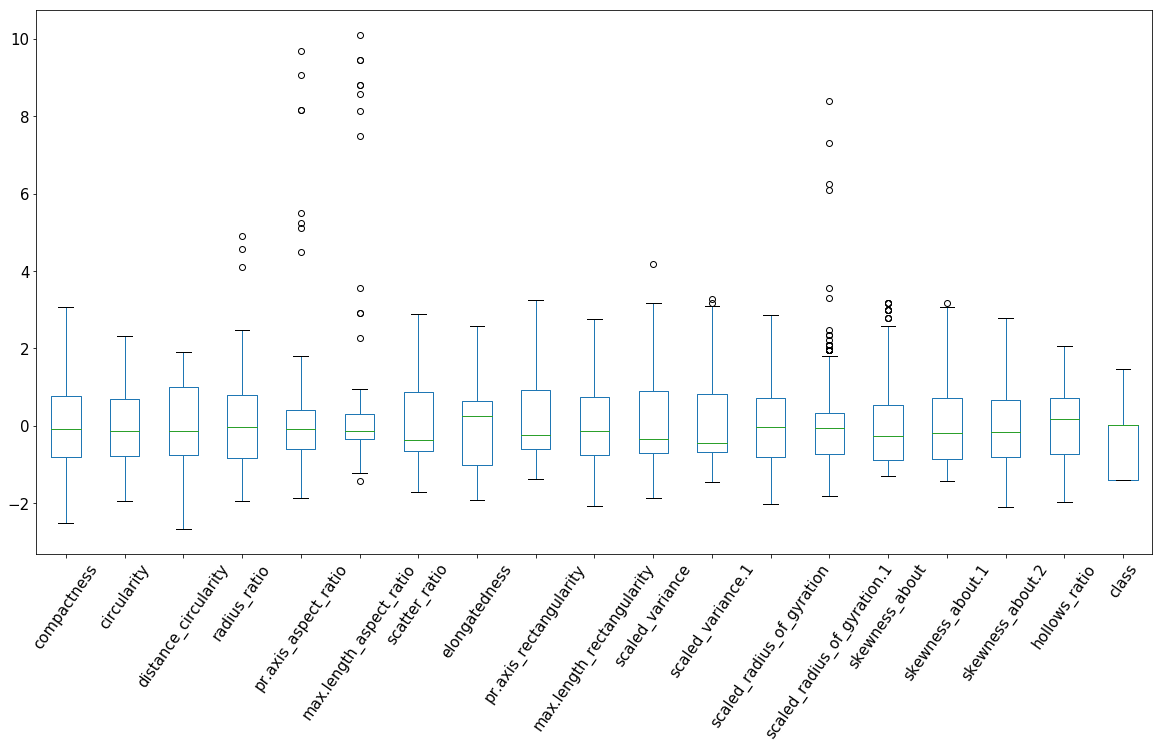

In [483]:
#Using BoxPlot to check Outliers
#Did Scallign here as I am plotting all the columns boxplot in single graph .....
#as their scales are different it wont show outlier without scalling ...
pd.DataFrame(StandardScaler().fit_transform(df.astype(float)), columns=list(df)).boxplot(figsize=(20,10), grid=False, rot=55, fontsize=15)

In [484]:
#Outliers - An Other Check

In [485]:
#Print Outliers
#Other Way to Look at Outliers
for cols in df.columns:
  Q3 = df[cols].quantile(0.75)
  Q2 = df[cols].quantile(0.5)
  Q1 = df[cols].quantile(0.25)
  IQR = Q3-Q1
  print(f'{cols.capitalize()}')
  print(f'Number of rows with outliers: {len(df.loc[(df[cols] < (Q2 - 1.5 * IQR)) | (df[cols] > (Q2 + 1.5 * IQR))])}')
  display(df.loc[(df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))])

Compactness
Number of rows with outliers: 11


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


Circularity
Number of rows with outliers: 6


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


Distance_circularity
Number of rows with outliers: 0


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


Radius_ratio
Number of rows with outliers: 4


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
37,90,48.0,86.0,306.0,126.0,49,153.0,44.0,19.0,156,272.0,346.0,200.0,118.0,0.0,15.0,185.0,194,2
135,89,47.0,83.0,322.0,133.0,48,158.0,43.0,20.0,163,229.0,364.0,176.0,97.0,0.0,14.0,184.0,194,2
388,94,47.0,85.0,333.0,138.0,49,155.0,43.0,19.0,155,320.0,354.0,187.0,135.0,12.0,9.0,188.0,196,2


Pr.axis_aspect_ratio
Number of rows with outliers: 29


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0
37,90,48.0,86.0,306.0,126.0,49,153.0,44.0,19.0,156,272.0,346.0,200.0,118.0,0.0,15.0,185.0,194,2
100,82,45.0,66.0,252.0,126.0,52,148.0,45.0,19.0,144,237.0,326.0,185.0,119.0,1.0,1.0,181.0,185,0
135,89,47.0,83.0,322.0,133.0,48,158.0,43.0,20.0,163,229.0,364.0,176.0,97.0,0.0,14.0,184.0,194,2
291,89,45.0,81.0,246.0,102.0,43,155.0,44.0,20.0,160,200.0,347.0,177.0,90.0,9.0,17.0,183.0,192,2
388,94,47.0,85.0,333.0,138.0,49,155.0,43.0,19.0,155,320.0,354.0,187.0,135.0,12.0,9.0,188.0,196,2
523,90,43.0,81.0,231.0,97.0,46,150.0,45.0,19.0,149,200.0,332.0,164.0,91.0,5.0,9.0,186.0,196,2
706,82,43.0,70.0,250.0,105.0,55,139.0,48.0,18.0,145,231.0,289.0,172.0,99.0,4.0,9.0,190.0,199,2


Max.length_aspect_ratio
Number of rows with outliers: 20


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0
37,90,48.0,86.0,306.0,126.0,49,153.0,44.0,19.0,156,272.0,346.0,200.0,118.0,0.0,15.0,185.0,194,2
100,82,45.0,66.0,252.0,126.0,52,148.0,45.0,19.0,144,237.0,326.0,185.0,119.0,1.0,1.0,181.0,185,0
127,85,41.0,66.0,155.0,65.0,22,149.0,45.0,19.0,139,173.0,330.0,155.0,75.0,6.0,16.0,184.0,191,0
135,89,47.0,83.0,322.0,133.0,48,158.0,43.0,20.0,163,229.0,364.0,176.0,97.0,0.0,14.0,184.0,194,2
291,89,45.0,81.0,246.0,102.0,43,155.0,44.0,20.0,160,200.0,347.0,177.0,90.0,9.0,17.0,183.0,192,2
388,94,47.0,85.0,333.0,138.0,49,155.0,43.0,19.0,155,320.0,354.0,187.0,135.0,12.0,9.0,188.0,196,2
391,91,38.0,70.0,160.0,66.0,25,140.0,47.0,18.0,139,162.0,296.0,130.0,67.0,4.0,11.0,192.0,202,2
523,90,43.0,81.0,231.0,97.0,46,150.0,45.0,19.0,149,200.0,332.0,164.0,91.0,5.0,9.0,186.0,196,2
544,88,43.0,70.0,177.0,74.0,19,152.0,44.0,19.0,143,180.0,342.0,168.0,76.0,1.0,9.0,186.0,189,0


Scatter_ratio
Number of rows with outliers: 24


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


Elongatedness
Number of rows with outliers: 0


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


Pr.axis_rectangularity
Number of rows with outliers: 15


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


Max.length_rectangularity
Number of rows with outliers: 6


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


Scaled_variance
Number of rows with outliers: 27


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
388,94,47.0,85.0,333.0,138.0,49,155.0,43.0,19.0,155,320.0,354.0,187.0,135.0,12.0,9.0,188.0,196,2


Scaled_variance.1
Number of rows with outliers: 26


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
85,110,58.0,106.0,180.0,51.0,6,261.0,26.0,28.0,171,278.0,998.0,257.0,83.0,9.0,13.0,181.0,182,0
835,111,58.0,105.0,183.0,51.0,6,265.0,26.0,29.0,174,285.0,1018.0,255.0,85.0,4.0,8.0,181.0,183,0


Scaled_radius_of_gyration
Number of rows with outliers: 13


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


Scaled_radius_of_gyration.1
Number of rows with outliers: 63


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0
37,90,48.0,86.0,306.0,126.0,49,153.0,44.0,19.0,156,272.0,346.0,200.0,118.0,0.0,15.0,185.0,194,2
47,85,42.0,66.0,122.0,54.0,6,148.0,46.0,19.0,141,172.0,317.0,174.0,88.0,6.0,14.0,180.0,182,0
79,89,44.0,68.0,113.0,50.0,7,150.0,45.0,19.0,147,171.0,328.0,189.0,88.0,6.0,5.0,179.0,182,0
100,82,45.0,66.0,252.0,126.0,52,148.0,45.0,19.0,144,237.0,326.0,185.0,119.0,1.0,1.0,181.0,185,0
135,89,47.0,83.0,322.0,133.0,48,158.0,43.0,20.0,163,229.0,364.0,176.0,97.0,0.0,14.0,184.0,194,2
230,85,35.0,47.0,110.0,55.0,3,117.0,57.0,17.0,122,136.0,203.0,139.0,89.0,5.0,9.0,180.0,184,2
291,89,45.0,81.0,246.0,102.0,43,155.0,44.0,20.0,160,200.0,347.0,177.0,90.0,9.0,17.0,183.0,192,2
381,106,54.0,100.0,227.0,67.0,4,250.0,27.0,27.0,162,280.0,923.0,262.0,88.0,5.0,11.0,182.0,182,0
388,94,47.0,85.0,333.0,138.0,49,155.0,43.0,19.0,155,320.0,354.0,187.0,135.0,12.0,9.0,188.0,196,2


Skewness_about
Number of rows with outliers: 44


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
44,119,54.0,106.0,220.0,65.0,12,213.0,31.0,24.0,167,223.0,675.0,232.0,66.0,20.0,1.0,192.0,202,1
113,88,35.0,50.0,121.0,58.0,5,114.0,59.0,17.0,122,132.0,192.0,138.0,74.0,21.0,4.0,182.0,187,1
123,90,36.0,57.0,130.0,57.0,6,121.0,56.0,17.0,127,137.0,216.0,132.0,68.0,22.0,23.0,190.0,195,1
190,97,48.0,94.0,198.0,63.0,9,181.0,36.0,21.0,155,200.0,494.0,189.0,64.0,20.0,11.0,199.0,203,1
346,117,52.0,110.0,228.0,65.0,12,212.0,31.0,24.0,163,228.0,668.0,220.0,66.0,21.0,25.0,194.0,205,1
400,107,53.0,108.0,213.0,64.0,12,206.0,32.0,23.0,163,216.0,627.0,202.0,65.0,21.0,22.0,194.0,205,1
505,115,53.0,100.0,205.0,64.0,11,220.0,30.0,25.0,166,229.0,710.0,214.0,71.0,21.0,11.0,189.0,199,1
516,92,42.0,75.0,172.0,60.0,8,147.0,45.0,19.0,142,174.0,322.0,160.0,62.0,22.0,10.0,206.0,211,1
623,106,52.0,108.0,207.0,64.0,12,221.0,31.0,25.0,168,229.0,709.0,200.0,73.0,22.0,38.0,190.0,205,1
761,115,51.0,100.0,201.0,60.0,12,196.0,34.0,23.0,162,207.0,573.0,184.0,62.0,22.0,1.0,198.0,208,1


Skewness_about.1
Number of rows with outliers: 22


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
132,97,42.0,101.0,186.0,59.0,9,186.0,36.0,22.0,138,208.0,511.0,168.0,67.0,7.0,41.0,194.0,206,1


Skewness_about.2
Number of rows with outliers: 18


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


Hollows_ratio
Number of rows with outliers: 0


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


Class
Number of rows with outliers: 0


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


In [486]:
#Replacing outliers < q2-1.5*IQR with q2-1.5*IQR and outliers > q2+1.5*IQR with q2+1.5*IQR
#CODE TO REMOVE OUTLIERS
import math
for col in df.columns:
    if(col == 'origin'):
        continue
    q1 = df[col].quantile(0.25)
    q2 = df[col].quantile(0.5)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    low = q2 - 1.5*iqr
    high = q2 + 1.5*iqr
    df.loc[(df[col] < low), col] = math.floor(low+1)
    df.loc[(df[col] > high), col] = math.floor(high-1)

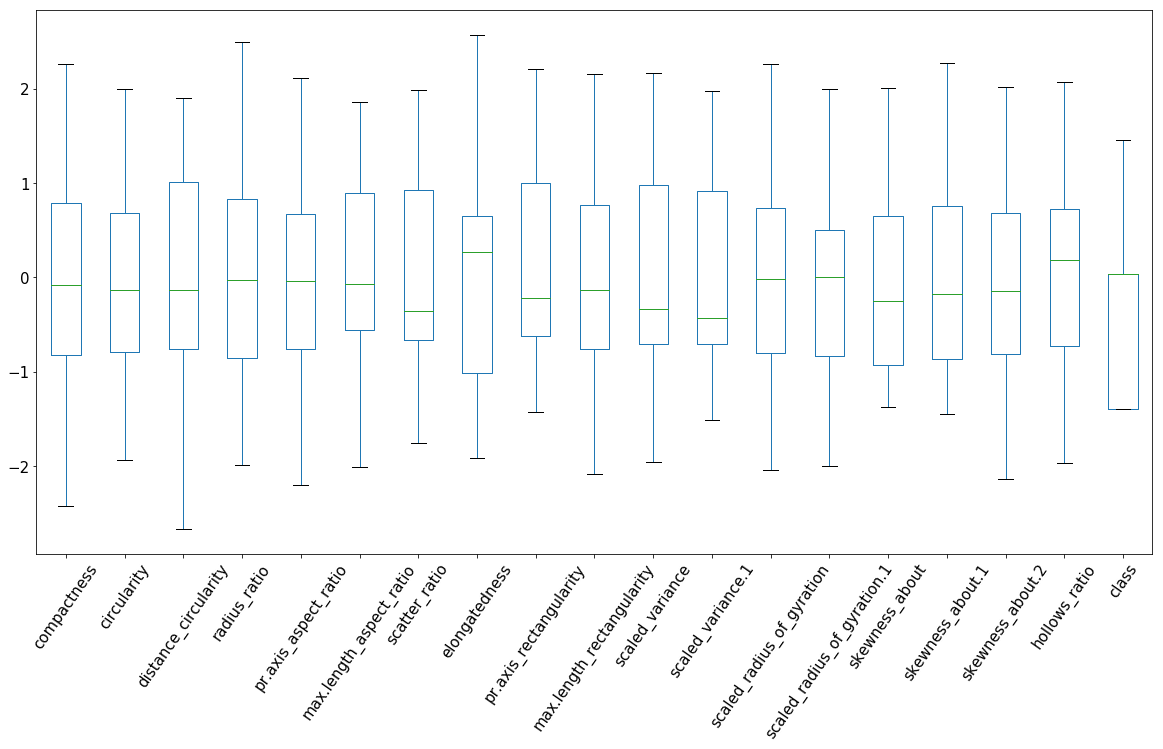

In [487]:
#Using BoxPlot to check Outliers
#Did Scallign here as I am plotting all the columns boxplot in single graph .....
#as their scales are different it wont show outlier without scalling ...
pd.DataFrame(StandardScaler().fit_transform(df.astype(float)), columns=list(df)).boxplot(figsize=(20,10), grid=False, rot=55, fontsize=15)

In [488]:
#No Outliers Now ----- :)

In [489]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                            int32
dtype: object

In [490]:
#Data looks Cleans

In [491]:
###############Finding Correlation between all independent variables with respect to output variable('class')


#Pearsons method (df.corr()) is used to comapre to numerical variables but to find out the 
#Correlation between Numerical feature and a Categorical feature we need to use independent t-test from stats

In [492]:
#stats_corr2 is my own helper function on top of stats.ttest_ind 

for col in df.columns:
    print(col)
    print("\t")
    stats_corr2(df, col, 'class')

compactness
	
Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=6.3698394166652355, pvalue=3.598447726104278e-10)



circularity
	
Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=2.042813161611334, pvalue=0.04147692615337517)



distance_circularity
	
Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=9.821695651290225, pvalue=2.594843544838111e-21)



radius_ratio
	
Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=5.736643616630031, pvalue=1.485419377865614e-08)



pr.axis_aspect_ratio
	
Correlation Using Inferential Statistics
___________________________________________________

Ttest_indResult(statistic=-4.192973275581691, pvalue=3.138116349870943e-05)



max.length_aspect_ratio
	
Correlation Using Inferen

In [493]:
#p-value is less than 0.05 for the following columns .....So these columns are not in correlation with the output Column
#'circulatiry', 'max.length_rectangularity', 'scaled_varience', 'scaled_radius_of_gyration', skewness_about

#'skendness_about.2' and 'scaled_varience.1' and 'elogatedness' (are  in narrow correlation with 'class')

In [494]:
###Lets See How the Independent Variables are Related to Each Other ......Here we can use df.corr() as both the 
#indepnent variables under comparision are Numeric in Nature

In [495]:
#All these 8 columns which are not in great correleation with output column......can be dropped as there are other columns
#in great correlation with these 8 columns .......

#So removing these 8 columns is a double benefit :) ............
#1) we remove columsn not in correlation with output col
#)we also elminate muliticolinarity of these 8 cols with other independent columns


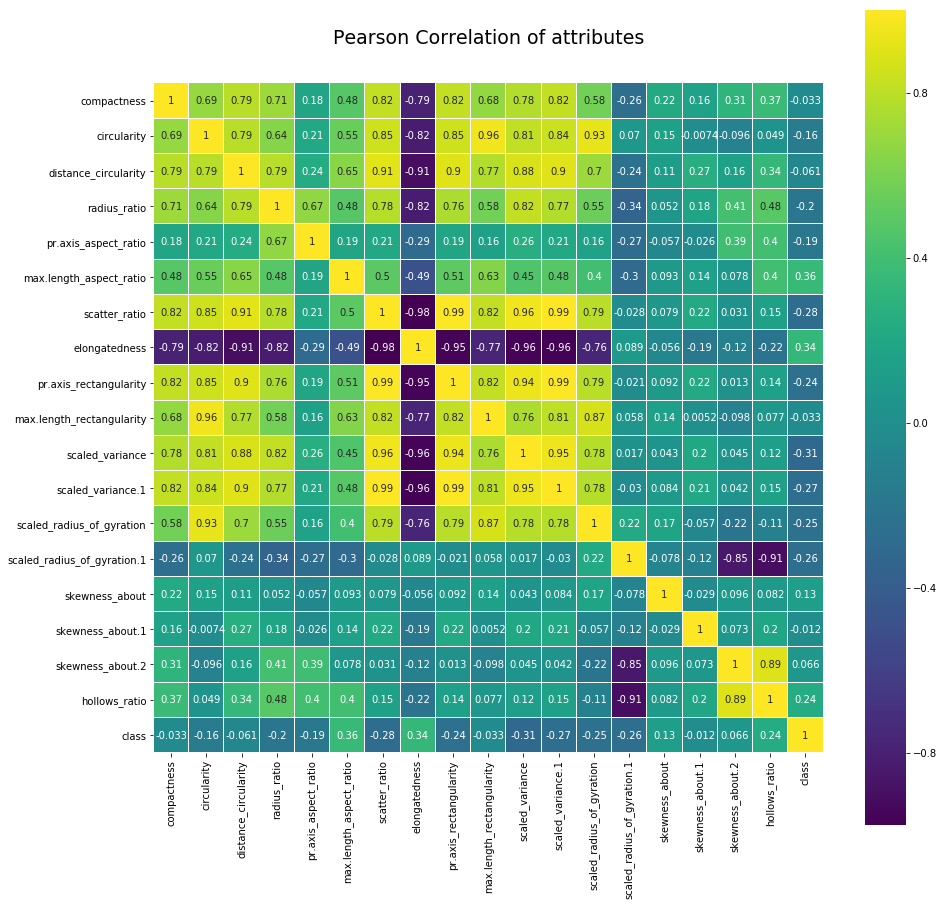

In [496]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [497]:
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [498]:
#Making a copy of the the dataframe before dropping thse columns
df_original = df.copy()

In [499]:
#Dropping 8 Columns
df = df.drop(['circularity','max.length_rectangularity','scaled_variance','scaled_radius_of_gyration','scaled_radius_of_gyration','scaled_variance.1','elongatedness'], axis=1)

In [500]:
df.columns

Index(['compactness', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'pr.axis_rectangularity', 'scaled_radius_of_gyration.1',
       'skewness_about', 'skewness_about.1', 'skewness_about.2',
       'hollows_ratio', 'class'],
      dtype='object')

In [501]:
#Lets See a Pair Plot after Removing the Selected Columns

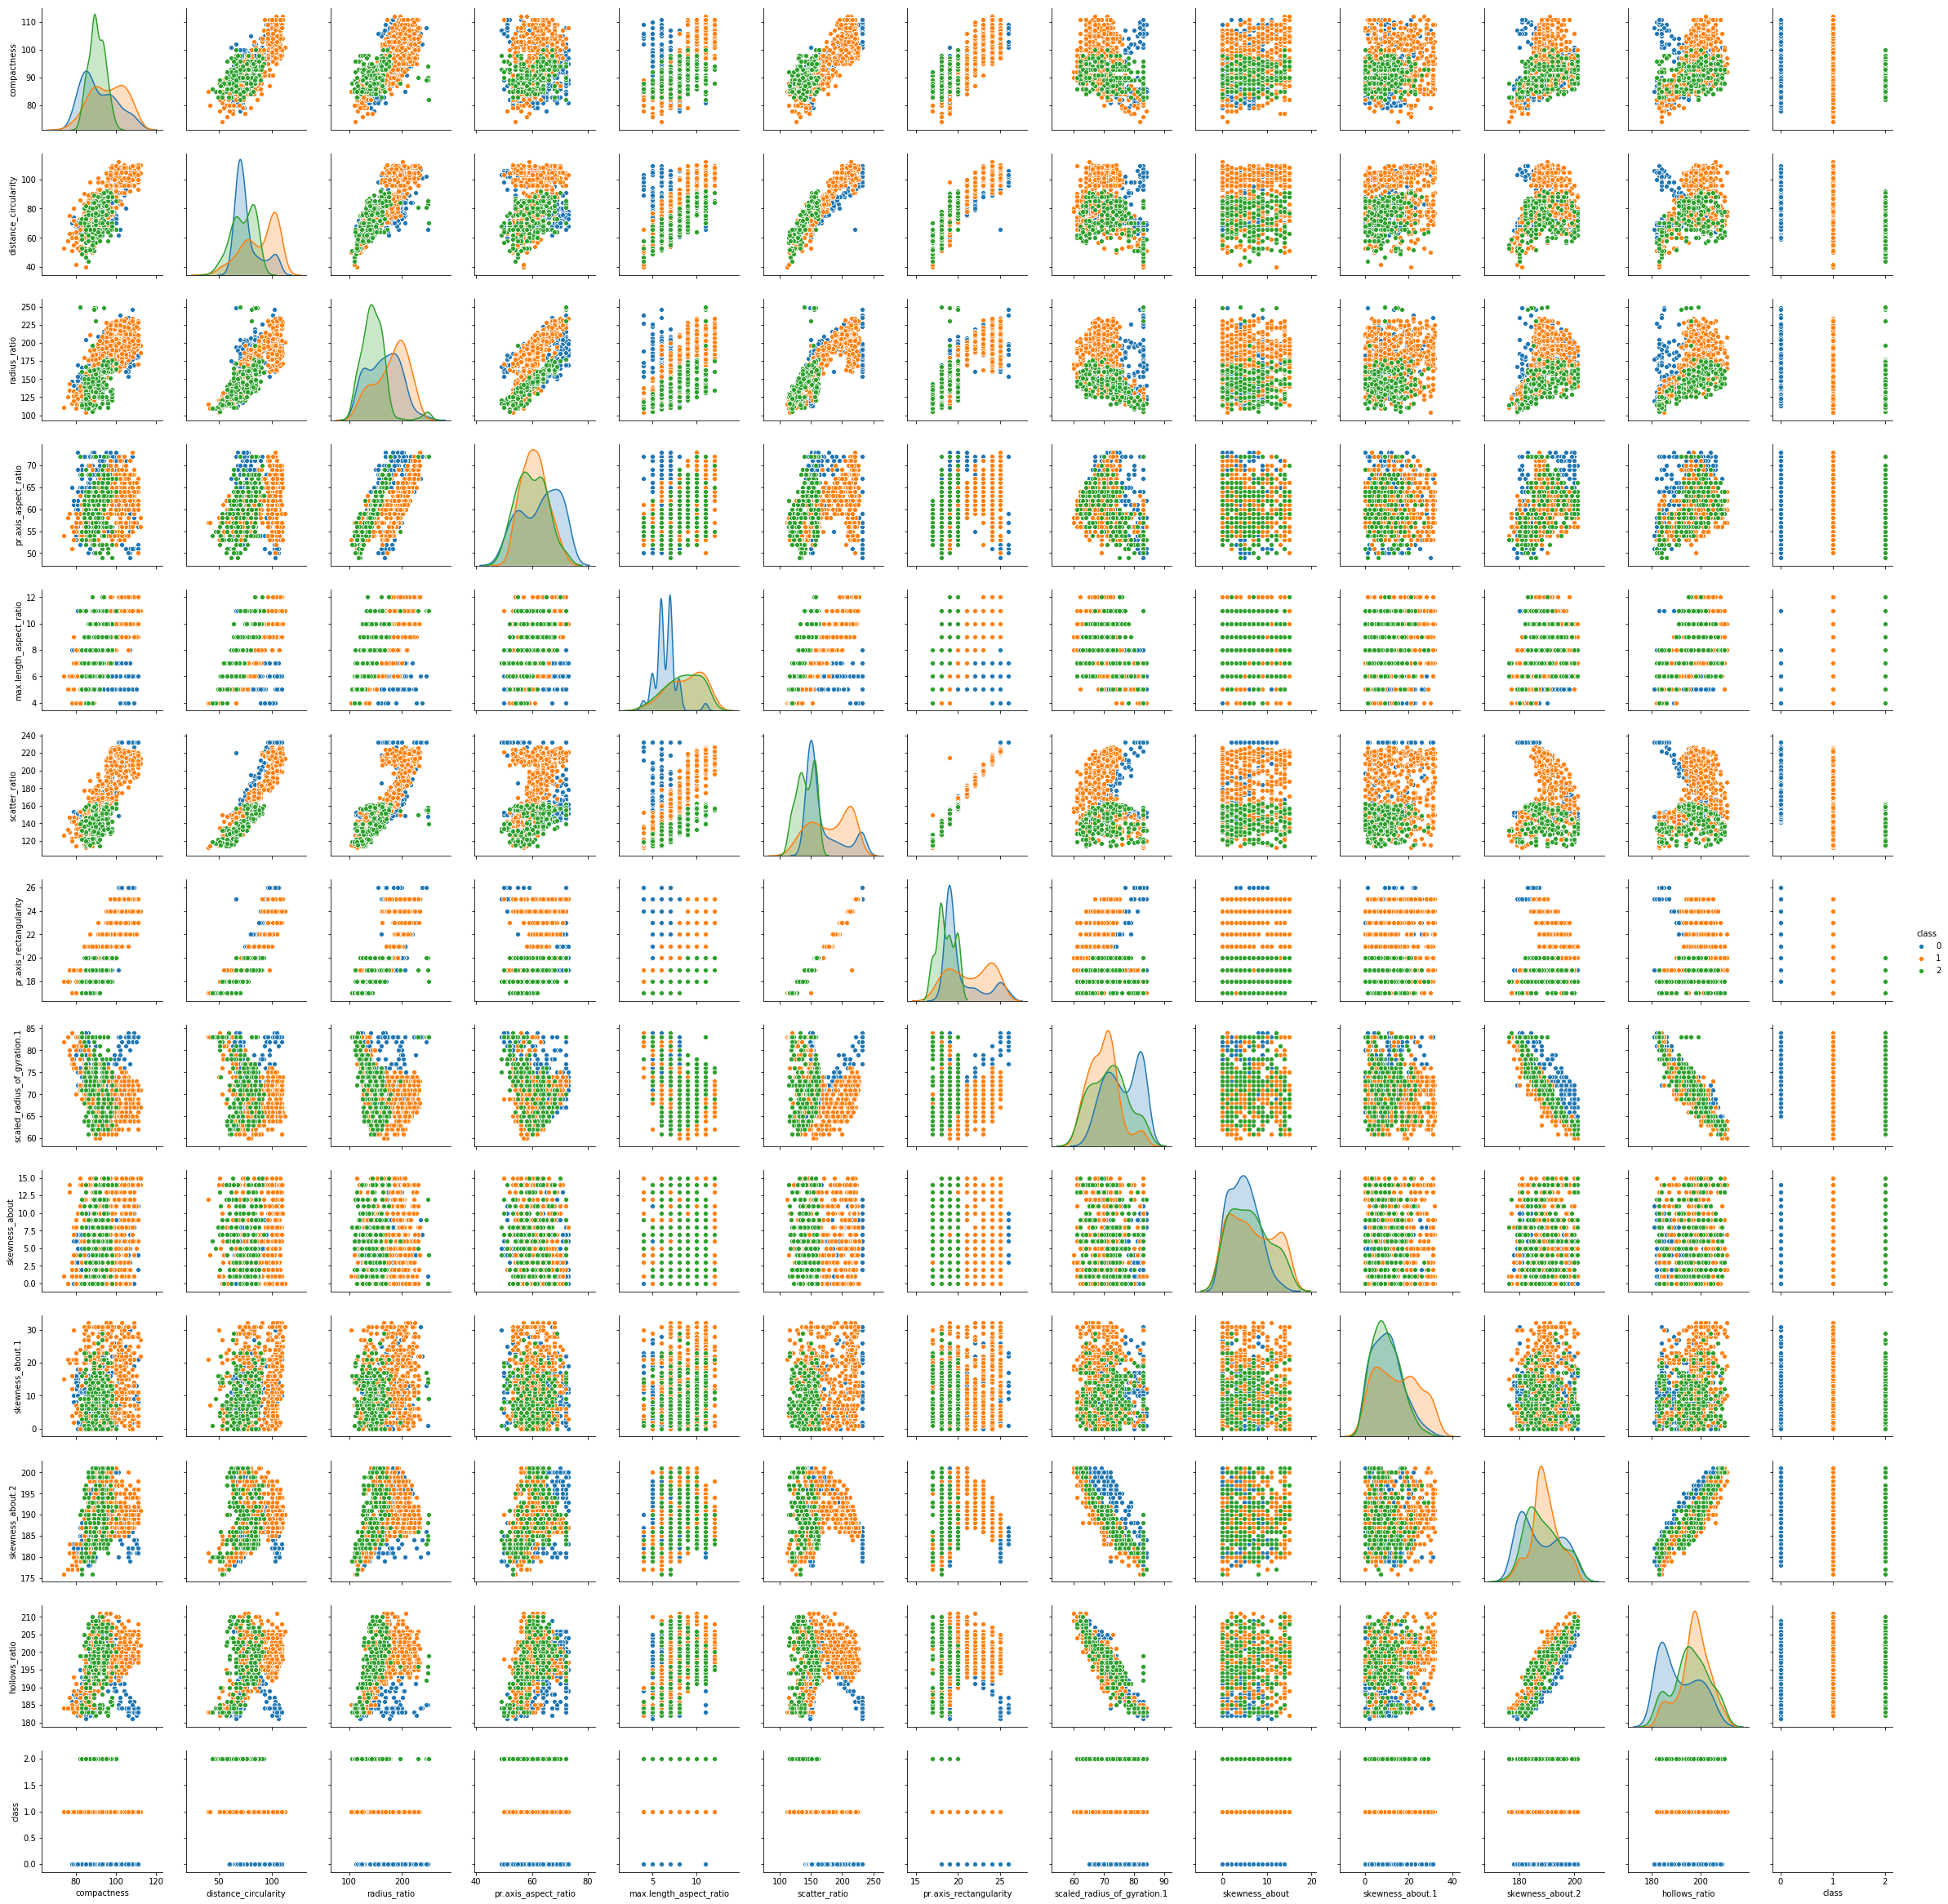

In [208]:
sns.pairplot(df, hue='class')

In [502]:
#Some LEVEL of Multicollineariy has been Removed and we dont see many linear Relationsships in the Pair Plot

SVC(C=1.5000000000000002, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=10, shrinking=True,
  tol=0.001, verbose=False)
___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[44  0  0]
 [ 0 84  5]
 [ 0  3 34]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Train Accuracy  : 0.9792899408284024

Test Accuracy   : 0.9529411764705882

Precision Score : [1.         0.96551724 0.87179487]

Recall Score    : [1.         0.94382022 0.91891892]

F1 Score        : [1.         0.95454545 0.89473684]

___________________________________________________

Classification Report :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.97      0.94      0.95        89
           2       0.87      0.92      0.8

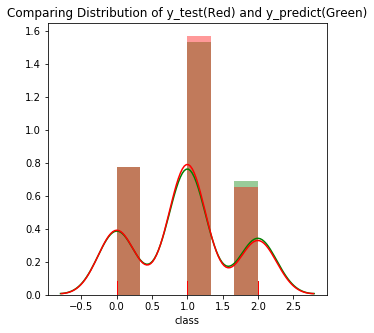

In [503]:
#Applying SVC on Original DataFrame

#Here I am doing the scaling while pasing s_scaler = True (my helper function takes care of this)

#Use_SVCClassifier is my own Wrapper Function over SVC -- 
#Code for Use_SVCClassifier in the starting of the NoteBook
Use_SVCClassifier(df, 0, 'class', s_scaler=True, C=1.5000000000000002, plot=True)

In [504]:
#ACCUARY SCORE BY USING DATA FRAME DIRECTLY WITHOUT PCA
#Train Accuracy  : 0.9792899408284024
#Test Accuracy   : 0.9529411764705882
#Precision Score : [1.         0.96551724 0.87179487]
#Recall Score    : [1.         0.94382022 0.91891892]

In [505]:
#########Question 5 - Use PCA SCikit Learn, extract Principal Components that capture 95% of varience in Data############

In [506]:
############################Using the df_original which has all the columns for the PCA

In [507]:
df_new = df_original.drop('class', axis=1)

In [508]:
#Question 5 - Use PCA SCikit Learn, extract Principal Components that capture 95% of varience in Data
df_scaled = StandardScaler().fit_transform(df_new.astype(float))
#Extracting Principal Components that capure 95% of variance
pca = PCA(0.95)
data_pca = pca.fit_transform(df_scaled)
data_pca.transpose()

array([[-0.59838074,  1.52095083, -4.00263876, ..., -5.22180194,
         3.33511467,  5.0411622 ],
       [-0.60065871, -0.37971392,  0.30641114, ..., -0.06726822,
        -1.17290412,  0.34451253],
       [-0.49722843, -0.14973131, -1.23945712, ..., -0.58082478,
         2.01951636,  1.3491993 ],
       ...,
       [-0.7271365 , -0.42883826,  0.89219409, ..., -1.25012712,
        -0.47761334, -0.12563783],
       [ 1.73348814,  0.23104873,  0.74698056, ..., -0.27614112,
        -0.07466655, -0.44272141],
       [-0.42426755,  0.2049737 ,  0.77276342, ...,  0.85370326,
        -0.34582201, -0.42626005]])

In [509]:
#so PCA selected 7 principal components when the caputred varience in Data is 95%
data_pca.shape

(846, 7)

In [510]:
#Forming New DataFrame for PCA 
df_new = pd.DataFrame(data_pca)

In [511]:
#Adding the Target Column
df_new['class'] = df_original['class']

In [512]:
####################################################################################################################
####################################################################################################################
#DataFrame After PCA  -------------------------------------------------Its Ready
df_new.head(20)

,0,1,2,3,4,5,6,class
0,-0.598381,-0.600659,-0.497228,0.830409,-0.727136,1.733488,-0.424268,2
1,1.520951,-0.379714,-0.149731,-1.272819,-0.428838,0.231049,0.204974,2
2,-4.002639,0.306411,-1.239457,-0.368347,0.892194,0.746981,0.772763,1
3,1.527735,-3.104363,-0.443133,-0.328544,-0.687545,-0.318776,0.096487,2
4,0.242002,1.872377,-0.632551,1.736794,0.145289,2.993511,1.350134,0
5,-4.105275,4.094601,0.911224,-0.531853,1.277847,-2.236831,0.547352,0
6,0.782899,-2.275885,-2.119903,-0.052718,1.490112,-0.611578,-0.351660,0
7,1.976280,-1.558078,-1.142914,0.874322,-1.195455,-0.119461,-0.372256,2
8,4.409720,-3.408456,0.532499,0.058790,-0.484448,-0.619329,-0.339682,2
9,-1.531151,-2.170459,0.600370,-0.068716,-0.955002,-0.206679,0.845735,1


SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=10, shrinking=True,
  tol=0.001, verbose=False)
___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[41  1  2]
 [ 1 81  7]
 [ 0  2 35]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Train Accuracy  : 0.9733727810650887

Test Accuracy   : 0.9235294117647059

Precision Score : [0.97619048 0.96428571 0.79545455]

Recall Score    : [0.93181818 0.91011236 0.94594595]

F1 Score        : [0.95348837 0.93641618 0.86419753]

___________________________________________________

Classification Report :

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        44
           1       0.96      0.91      0.94        89
           2       0.80      0.95      0.86        37

   m

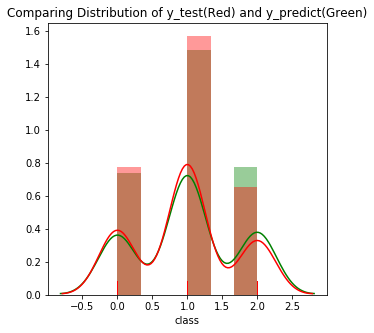

In [513]:
#Running SVC Classifier on the Data Frame after PCA on DataFrame.....
Use_SVCClassifier(df_new, 0, 'class', s_scaler=True, C=5, plot=True, Roc=True)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=10, shrinking=True,
  tol=0.001, verbose=False))])
___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[41  1  2]
 [ 1 81  7]
 [ 0  2 35]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Train Accuracy  : 0.9733727810650887

Test Accuracy   : 0.9235294117647059

Precision Score : [0.97619048 0.96428571 0.79545455]

Recall Score    : [0.93181818 0.91011236 0.94594595]

F1 Score        : [0.95348837 0.93641618 0.86419753]

___________________________________________________

Classification Report :

              precision    recall  f1-score   s

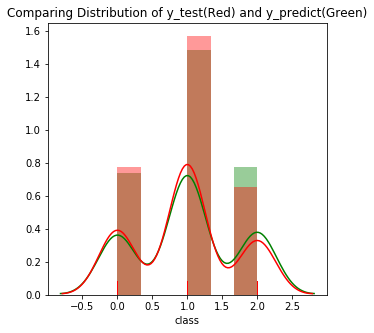

In [514]:
# APPLYING SVM ON DATA FRAME AFTER PCA ------ using PIPE--------------method 2 :)

#An Other Way of of applying SVM Classification on PCA fit data is to use PIPE.....
#Pipe has been shown in the class in an example but its not been convered officially yet..
#Just want to use Pipe on (SVM and PCA) and see If I get the similar result as above 

#This function is my own helper function with code in the starting of the notebook .....
#It uses SVC, PCA and apply a pipe on it and fit the pipe model on the data ...

#Here too data is scaled ....

Use_PCA_SVC_PIPE(df_new, 0,'class', s_scaler=True, C=5, Roc=True, plot=True)

In [515]:
#"So passing PCA AND SVM to a Pipe" or "Taking the dataframe after PCA and passing it to SVM"....
#both giving similar results accuracy wise ......

In [516]:
##########################################################################################################################

In [517]:
####################################################Conclusion ############################################################

In [518]:
#ACCUARY SCORE BY USING DATA FRAME DIRECTLY(By dropping few columns) WITHOUT PCA
#Train Accuracy  : 0.9792899408284024
#Test Accuracy   : 0.9529411764705882
#Precision Score : [1.         0.96551724 0.87179487]
#Recall Score    : [1.         0.94382022 0.91891892]


#Running SVM Classifier on the DataFrame after PCA
#Train Accuracy  : 0.9733727810650887
#Test Accuracy   : 0.9235294117647059
#Precision Score : [0.97619048 0.96428571 0.79545455]
#Recall Score    : [0.93181818 0.91011236 0.94594595]

In [519]:
#So the Original DataFrame with 8 columsn dropped i.e 11 columns left is Doing Very Similar to the 
#Dataframe after PCA that can capture 95% variance (i,e it resulted in 7 Prinicple Components).....

#PCA is giving very similar results compared to the full dataset .....even after the dimensionality reductioin ...
#So we can Conclude that PCA did a good job in reducing dimentions without loosing much data......


In [520]:
#....PCA Can be used to improve accuracy Considering that Explainability of Model Goes for a Toss

In [521]:
# Just to see out of 7 principal componets which PC is contributing more to the result ....
#I have sued Random Forest and printed the Feature Imprtance 

<class 'pandas.core.frame.DataFrame'>
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)
___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[35  1  1]
 [ 1 84  5]
 [ 0  4 39]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Train Accuracy  : 0.9659763313609467

Test Accuracy   : 0.9294117647058824

Precision Score : [0.97222222 0.94382022 0.86666667]

Recall Score    : [0.94594595 0.93333333 0.90697674]

F1 Score        : [0.95890411 0.93854749 0.88636364]

___________________________________________________

Classification Report :


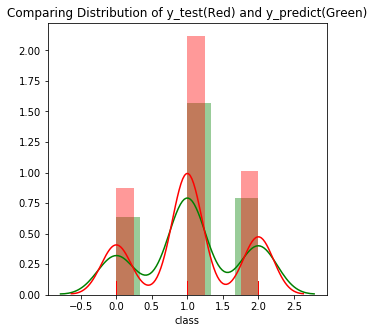

In [522]:
#Also Using Random Forest on the DataFrame after PCA ...Just to see how other models doing on PCA Data 
# And also to plot the Feature Importance ...So that its kind of gives an idea on which Principle Component
#is given more importance 
Use_RandomForestClassifier(df_new, 0, 'class',criterion='entropy', max_depth=14, min_samples_leaf=4, min_samples_split=2, n_estimators=8,n_jobs=2, plot=True,plot_features=True)

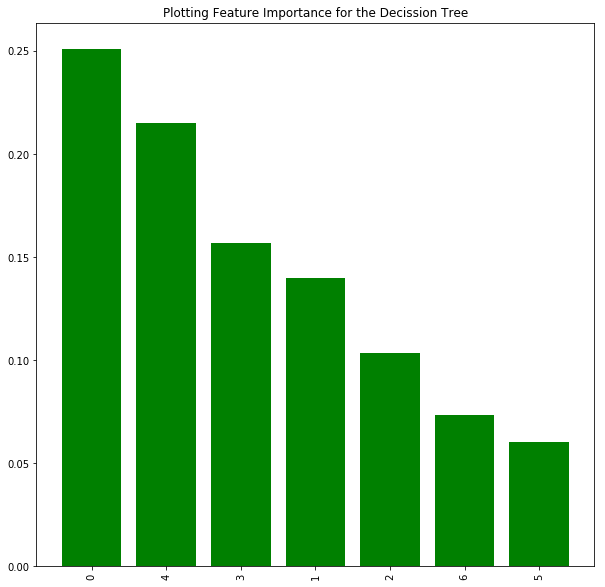

In [523]:
#The Bars Represent the Principle Components and now its a way to Understand may be which Principal Component has more 
#weightage 

#Just trying in to bring in Some EXPLAINABILITY TO PCA :) :) .....

#Plotting Feature Importance for RandomForest Classifier

plot_features_tree(size=10)

In [524]:
#These bars are 7 principle components ...Just trying to bring in some explainability :)........
#With the knowledge of which PC contributes more :)...anyhow a Prinicple Component can not be explained :)....

In [525]:
#####################################

In [526]:
#################################8th Optional Question ############################################################

In [527]:
#####################################

In [528]:
df_new.columns

Index([0, 1, 2, 3, 4, 5, 6, 'class'], dtype='object')

In [529]:
#Questioin  - Aplly Kmeans Clustering on principal components train data

coph_distance : 0.27886720825889283


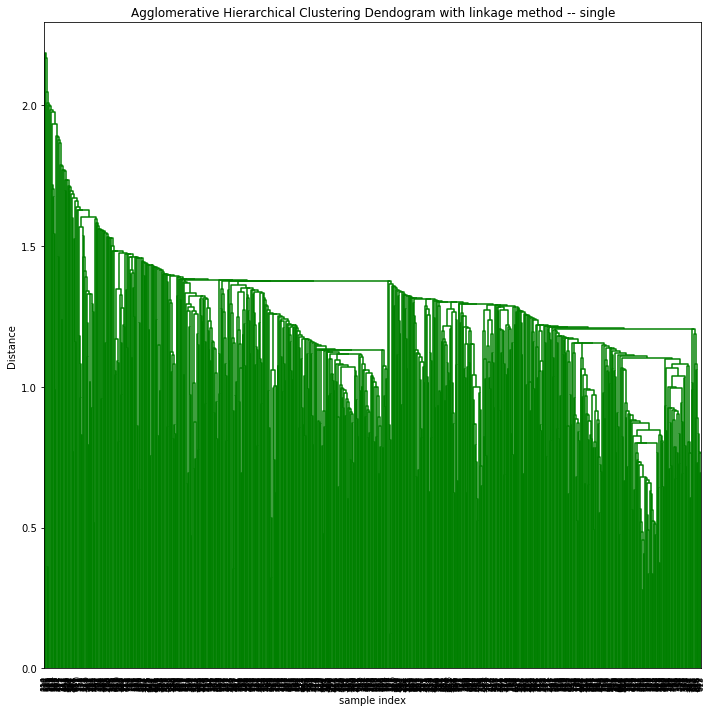

In [133]:
#Checking Single Linkage
plot_dendogram(df_new.drop('class', axis=1), 'single')

In [135]:
##########Single Linkage is Not Good at all ...Horrible is a better word :)..................

coph_distance : 0.7048797662862865


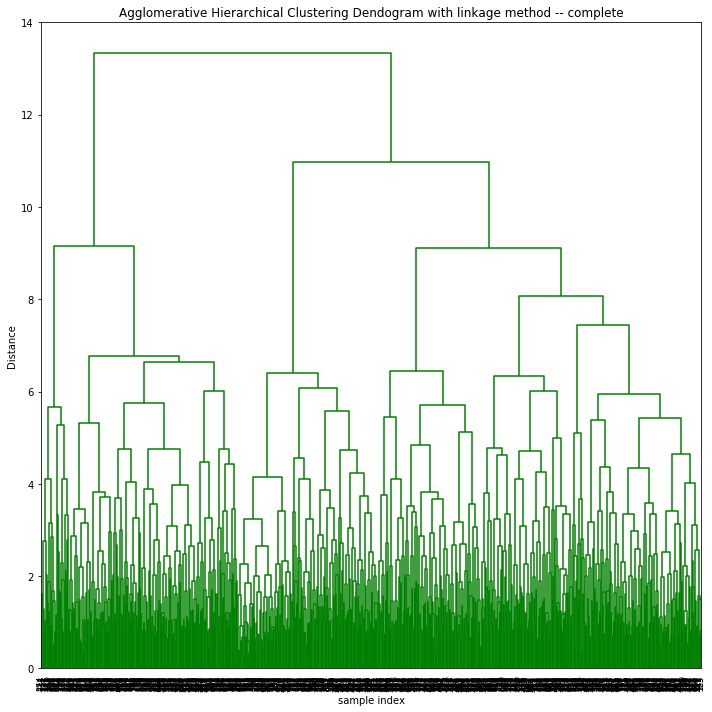

In [132]:
#Checking 
plot_dendogram(df_new.drop('class', axis=1), 'complete')

In [136]:
#Complete Linkage or Max-Linkage is not that Great .....better to check Wards

coph_distance : 0.7100586154764285


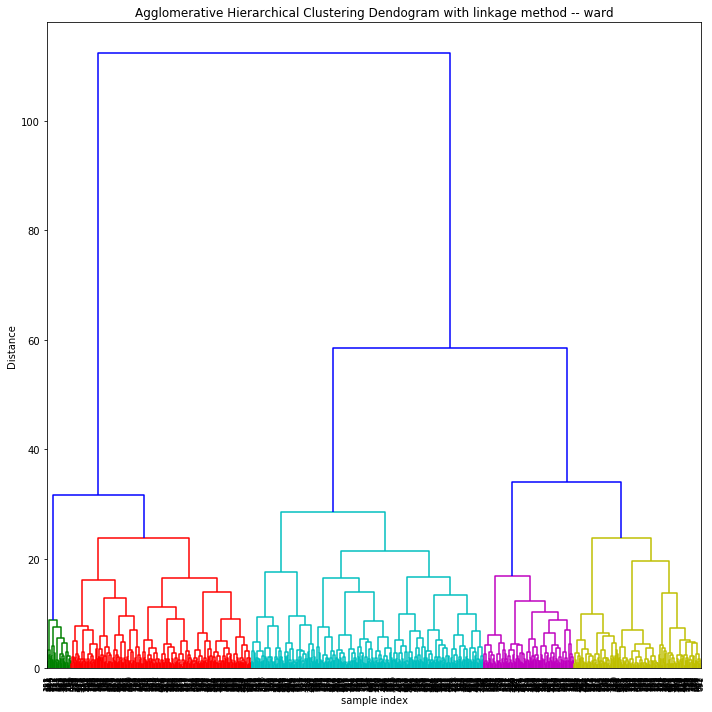

In [134]:
#Checking Ward Linkage
plot_dendogram(df_new.drop('class', axis=1), 'ward')

In [530]:
#Ward Linkage  look good ...

In [531]:
#Looks like there are 3 Natural Clusters and each cluster has two Sub Clusters ....

In [532]:
#So quickly checking for no of clusters = 3

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func='deprecated')


Number of Clusters   : 3
Homogenity_Score     : 0.14349103678096778
Completeness_Score   : 0.135244380492197
V_Measure_Score      : 0.13924571599458085
Adjusted_Rand_Score  : 0.10747045490962692
Adjusted_Mutual_Info : 0.13732512499160188
Silhouette_score     : 0.27488954818206873




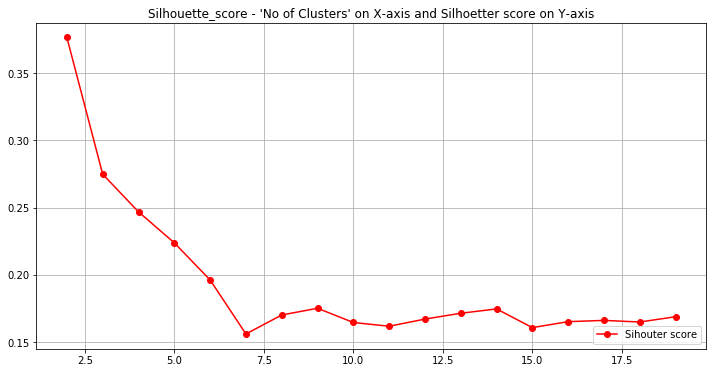

In [533]:
#Lets Perform Agglomerative Clusering with Linkate-method : ward
#Default method in Agglomerative Clustering is -- Ward 

#Use_Agglomerative is my own helper function on top of AgglomerativeClustering.
Use_Agglomerative_Clustering(df_new, 'class', n_clusters=3,plot_sil=True)

In [534]:
#Lets check with Kmean too and plot the Elbow Plot as well as how 3 cenroids are placed....

Number of Clusters   : 3
Homogenity_Score     : 0.11728407340449296
Completeness_Score   : 0.1114463266818765
V_Measure_Score      : 0.1142907034157479
Adjusted_Rand_Score  : 0.090294534920983
Adjusted_Mutual_Info : 0.11230599502102233
Silhouette_score     : 0.2953378882429696


_____________________________________________________
    Plotting Centroids and Number of Clusters = 3
_____________________________________________________


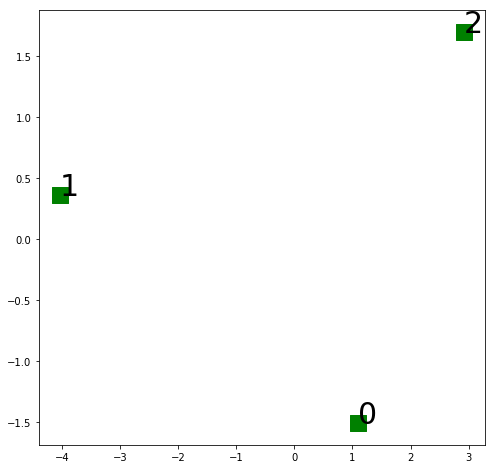

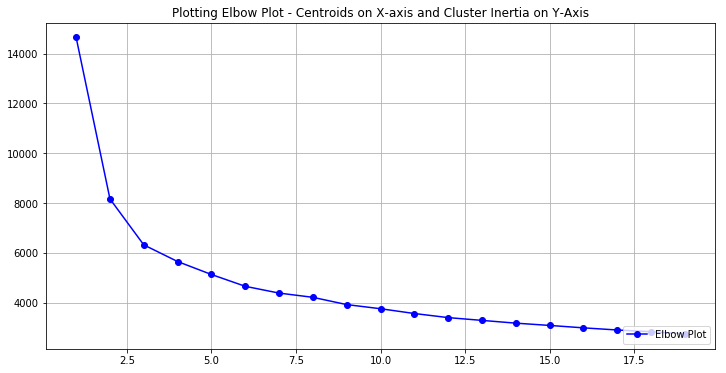

In [535]:
#Use_Kmeans is my own Wrapper function whose definition is in the starting of the notebook
Use_Kmean_Clustering(df_new, 'class', n_clusters=3, plot_elbow=True, plot_centroids=True)

In [536]:
#Even flow Elbow Plot after the 3rd Cluster the drop in Inertia is not very drastic ..so Condierign 3 as it also got
#confirmed by Dendogram

In [537]:
#kmeans.predict(df_new.drop(['class','labels'], axis=1)) can also be used 
#but kmeans.predict(x) return just kmeans.labels_ ....so both kmeas.predict(x) and kmeans.labels_ are one and the same ....

df_new['labels'] = pd.Series(kmeans.labels_)

In [538]:
#Let see how correleated the kmeans.labels_ with 'class'....we dint involve 'class' while generating clusters ..
#So if there is good correlation between 'class' and kmeans.labels_ then we can say with some confidence that 
#clustering went ok ......(This is not a standard Test ..but seen it working in most all the datasets I worked on :) )....

#Just a personal insight ....

#Using Chi2 test as both are categorical columns .....we cant use df.corr() ie pearsons here
#stats_corr_cat is my own helper function bilt on top of chi2 ...
stats_corr_cat(df_new, 'class','labels')

Correlation using Stats Chi2
(168.17607537330167, 2.5757146410474406e-35, 4, array([[ 87.09692671,  68.54373522,  62.35933806],
       [171.39716312, 134.88652482, 122.71631206],
       [ 79.50591017,  62.56973995,  56.92434988]]))


In [539]:
df_new.head(10)

,0,1,2,3,4,5,6,class,labels
0,-0.598381,-0.600659,-0.497228,0.830409,-0.727136,1.733488,-0.424268,2,0
1,1.520951,-0.379714,-0.149731,-1.272819,-0.428838,0.231049,0.204974,2,0
2,-4.002639,0.306411,-1.239457,-0.368347,0.892194,0.746981,0.772763,1,1
3,1.527735,-3.104363,-0.443133,-0.328544,-0.687545,-0.318776,0.096487,2,0
4,0.242002,1.872377,-0.632551,1.736794,0.145289,2.993511,1.350134,0,2
5,-4.105275,4.094601,0.911224,-0.531853,1.277847,-2.236831,0.547352,0,1
6,0.782899,-2.275885,-2.119903,-0.052718,1.490112,-0.611578,-0.351660,0,0
7,1.976280,-1.558078,-1.142914,0.874322,-1.195455,-0.119461,-0.372256,2,0
8,4.409720,-3.408456,0.532499,0.058790,-0.484448,-0.619329,-0.339682,2,0
9,-1.531151,-2.170459,0.600370,-0.068716,-0.955002,-0.206679,0.845735,1,0


In [540]:
#Sizes of all the 3 Clusters .............
df_new['labels'].value_counts()

0    338
1    266
2    242
Name: labels, dtype: int64

In [541]:
#Seperating Out 3 Clusters .......
df0 = df_new.loc[df_new['labels'] == 0,]
df1 = df_new.loc[df_new['labels'] == 1,]
df2 = df_new.loc[df_new['labels'] == 2,]

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=10, shrinking=True,
  tol=0.001, verbose=False)
___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[11  0  0]
 [ 1 31  2]
 [ 1  1 21]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Train Accuracy  : 0.9888888888888889

Test Accuracy   : 0.9264705882352942

Precision Score : [0.84615385 0.96875    0.91304348]

Recall Score    : [1.         0.91176471 0.91304348]

F1 Score        : [0.91666667 0.93939394 0.91304348]

___________________________________________________

Classification Report :

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       0.97      0.91      0.94        34
           2       0.91      0.91      0.91        23

   m

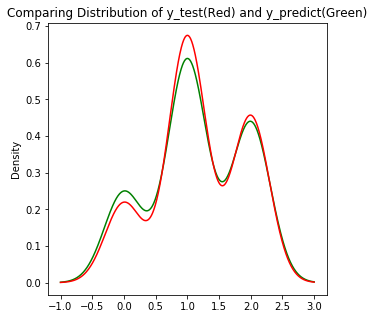

In [542]:
#SVC On Cluster-1 --- 
Use_SVCClassifier(df0.drop('labels', axis=1),0, 'class', C=5, plot_simple=True)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=10, shrinking=True,
  tol=0.001, verbose=False)
___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[16  0  0]
 [ 0 13  3]
 [ 0  3 14]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Train Accuracy  : 0.9585492227979274

Test Accuracy   : 0.8775510204081632

Precision Score : [1.         0.8125     0.82352941]

Recall Score    : [1.         0.8125     0.82352941]

F1 Score        : [1.         0.8125     0.82352941]

___________________________________________________

Classification Report :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.81      0.81      0.81        16
           2       0.82      0.82      0.82        17

   m

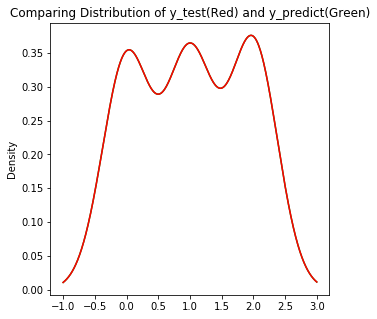

In [546]:
#SVC On Cluster-3
Use_SVCClassifier(df2.drop('labels', axis=1),0, 'class', C=5, plot_simple=True)

In [ ]:
#y_test(Red) Overlapping y_predict(Green)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=10, shrinking=True,
  tol=0.001, verbose=False)
___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[11  0]
 [ 0 43]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Train Accuracy  : 1.0

Test Accuracy   : 1.0

Precision Score : [1. 1.]

Recall Score    : [1. 1.]

F1 Score        : [1. 1.]

___________________________________________________

Classification Report :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        43

   micro avg       1.00      1.00      1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

________________________

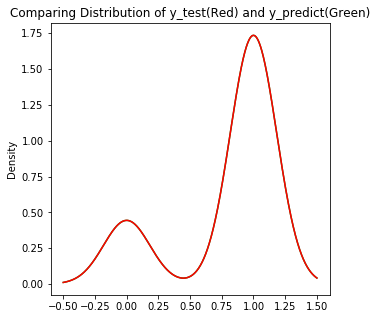

In [543]:
#SVC On Cluster-2
Use_SVCClassifier(df1.drop('labels', axis=1),0, 'class', C=5, plot_simple=True)

In [450]:
#y_test(Red) Overlapping y_predict(Green)

In [ ]:
#The Second Cluster of Principle componenets is giving 100% accuracy :) .......... ...this is cool 
#Other two groups performed well too .....
#So Clusters of principal components are giving good accuracy with this dataset ...........